# Adsorption of Monomers and Polymers

Adsorption of Monomers:

## Adsorption of ideal gas

$\dfrac{N_{ads}}{N} = \dfrac{e^{\delta / k_B T}}{e^{\delta / k_B T} + V_0/V_{ads}}$

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [20]:
import lattice_gas as laga
# important member functions: 
#   + someName.addMonomer(coordinates[np.array], attributes[dict])
#   + someName.plotConfig()
#   + someName.performMCS(time)
# important additional functions:
#   + calculateWallContacts(someName)
#
# or just use help(laga)
from scipy.optimize import curve_fit

normalized number of adsorbed monomers 0.125


<IPython.core.display.Javascript object>


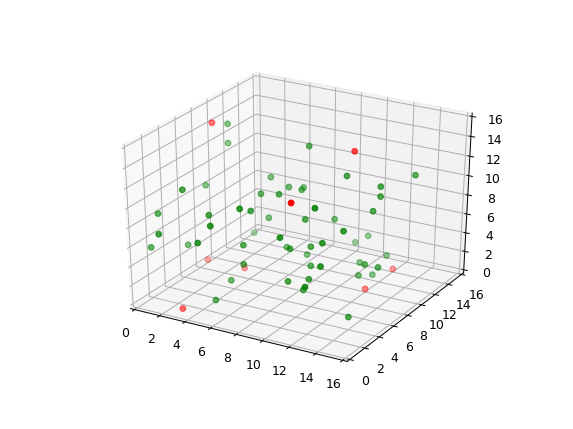

<IPython.core.display.Javascript object>


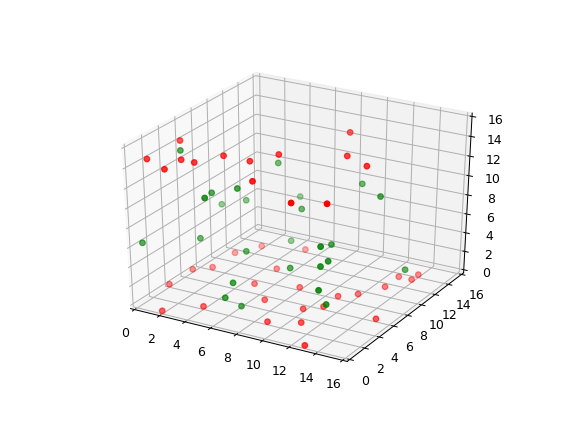

In [6]:
# try the laga module
box = [16,16,16]
periodic = [True, True, False]
numMonos = 64
delta = 8

testGas = laga.LatticeGasSimulator(box, periodic, delta)
for n in range(numMonos):
    newPos = np.random.randint(box[0]-1,size=(3))
    testGas.addMonomer(newPos, {})

print(f'normalized number of adsorbed monomers {laga.calculateWallContacts(testGas)}')
testGas.plotConfig()
testGas.performMCS(100)
testGas.plotConfig()

### perform the simulations:
* define variables
* loop over different deltas
* setup system and equilibrate, 
* sample mean number of adsorbed monomers (and maybe store results in file)
* plot results and compare with theory

In [18]:
box = [32,32,32]
periodic = [True, True, False]
numMonos = 256
delta = [0.0, 0.1,0.2,0.3,0.4, 0.5, 0.7,0.8, 1,2,3,5,8,10]
eQuilTime = 1000
n_sample = 500
n_timePerSample = 200

meanAdsorpedMonomers = np.zeros((len(delta)))

# setup system
for n in range(numMonos):
    gasSimulator = laga.LatticeGasSimulator(box, periodic, 0.0)
    newPos = np.random.randint(box[0]-1,size=(3))
    gasSimulator.addMonomer(newPos, {})

# sample Nads/N
for i, d in enumerate(delta):
    gasSimulator.delta = d
    gasSimulator.probabilityMultiplicator = np.exp(-gasSimulator.delta)
    
    gasSimulator.performMCS(eQuilTime)
    
    meanNadsN = 0.0
    
    for n in range(n_sample):
        gasSimulator.performMCS(n_timePerSample)
        meanNadsN += laga.calculateWallContacts(gasSimulator)
        
    meanAdsorpedMonomers[i] = (meanNadsN/n_sample)
    print(f"delta= {d}: Nads/N = {meanAdsorpedMonomers[i]}")

# store data
data = np.vstack((np.array(delta), meanAdsorpedMonomers) )

np.savetxt("gas_adsoprtion_n256.dat", data)

delta= 0.0: Nads/N = 0.072
delta= 0.1: Nads/N = 0.078
delta= 0.2: Nads/N = 0.066
delta= 0.3: Nads/N = 0.082
delta= 0.4: Nads/N = 0.096
delta= 0.5: Nads/N = 0.104
delta= 0.7: Nads/N = 0.134
delta= 0.8: Nads/N = 0.124
delta= 1: Nads/N = 0.142
delta= 2: Nads/N = 0.326
delta= 3: Nads/N = 0.538
delta= 5: Nads/N = 0.86
delta= 8: Nads/N = 0.98
delta= 10: Nads/N = 1.0


<IPython.core.display.Javascript object>


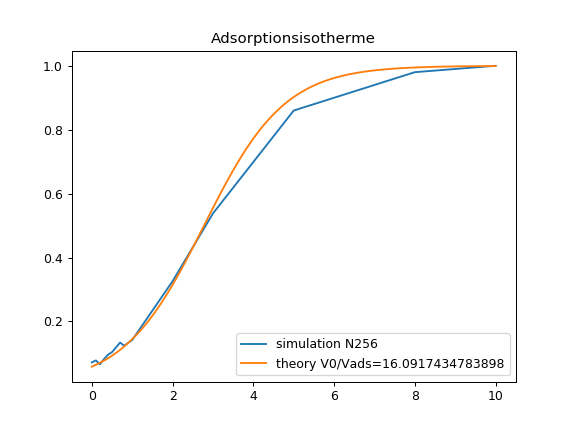

In [21]:

figure()

plot(data[0],data[1],label=f"simulation N{numMonos}")
fit_params, cov = curve_fit(laga.adsorptIsothermTheo, data[0], data[1] )
x = np.linspace(0,10,100)
plot(x,laga.adsorptIsothermTheo(x,fit_params[0]),label=f"theory V0/Vads={fit_params[0]}")

legend(loc="best")
title("Adsorptionsisotherme")
show()

Adsorption of Polymer

## Single chain in strong adsorption

Reduction of dimensionality by strong adsorption

In [22]:
import bfm_simulator as bfm
# important member functions: 
#   + someName.plotConfig()
#   + someName.performMCS(time, log = False, set True for more putput)
# important additional functions:
#   + setupLinearChains(chainlength, number of chains, box[array], periodicity[array], adsorption energy)
#   + calculateWallContacts(someName)
#   + calcRg2(someName) returns list of rg components for every molecule
#   + calculateDensityProfile(someName) returns np.array of size boxZ 
#
# or just use help(laga)

applied moves / attempted moves:
3332 / 12800 = 0.2603125


<IPython.core.display.Javascript object>


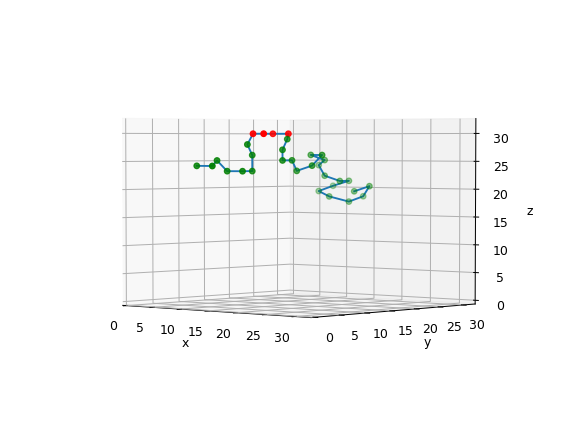

In [29]:
# try the bfm module

# parameters of the chain
chainlength_ = 32
numChains_ = 1
delta_ = 1.0

# parameters of the box
box = [32,32,32]
per = [True, True, False]

# create chain
singleChainSim = bfm.setupLinearChains(chainlength_, numChains_, box, per, delta_)
# equilibrate
singleChainSim.performMCS(400,True)
#look at config
singleChainSim.plotConfig()

perform the simulations:
* define variables
* setup system
* equilibrate and check config to avoid chain split to both sides
* run the sampling of N_ads/N and Rg2
* plot the results

applied moves / attempted moves:
3100 / 12800 = 0.2421875


<IPython.core.display.Javascript object>


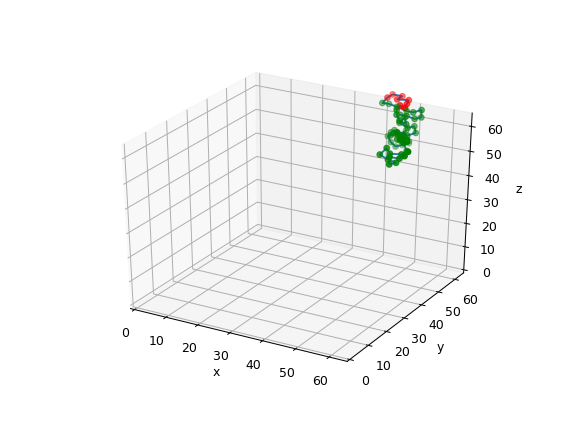

In [38]:
per = [True, True, False]
box = [64, 64, 64]
Nchain = 64
delta = 10
n_sample = 200
time_perSample = 100

singleChainAdsorption = bfm.setupLinearChains(Nchain, 1, box, per, delta)
# equilibrate
singleChainAdsorption.performMCS(200,True)
singleChainAdsorption.plotConfig()


<IPython.core.display.Javascript object>


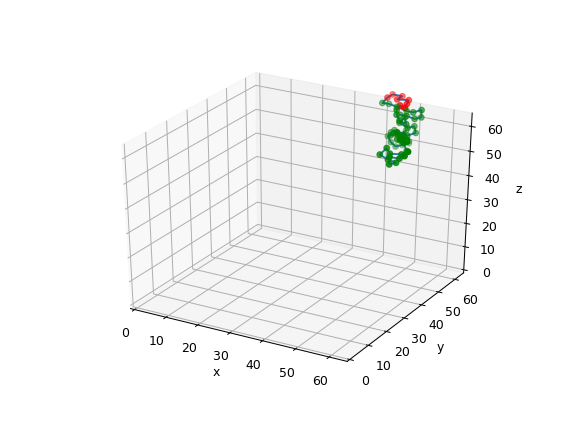

0.140625 [10.18359375 35.85058594 31.33374023]
0.484375 [39.10131836 32.37670898 46.03881836]
0.6875 [25.93359375 44.69433594 13.37402344]
0.828125 [31.26342773 56.25756836  3.98608398]


In [39]:
#NdsN = np.zeros((n_sample))
#Rg2 = np.zeros((n_sample,3))

singleChainAdsorption.plotConfig()
# sampling
for i in range(n_sample):
    singleChainAdsorption.performMCS(time_perSample,False)
    NdsN[i] = bfm.calculateWallContacts(singleChainAdsorption)
    Rg2[i] = np.array(bfm.calcRg2(singleChainAdsorption))
    if i%50 == 0:
        print(NdsN[i], Rg2[i])


<IPython.core.display.Javascript object>


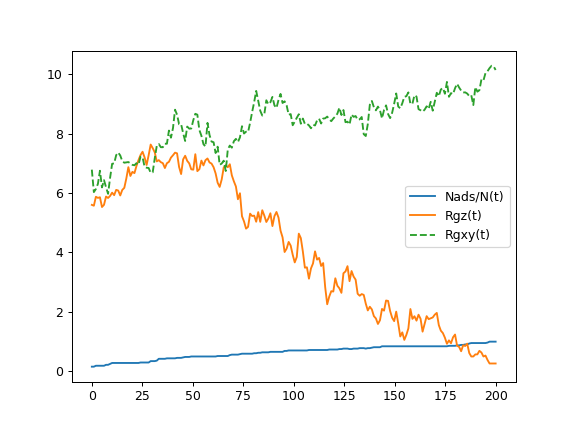

In [44]:
figure()

plot(np.linspace(0,n_sample, n_sample), NdsN, label="Nads/N(t)")
plot(np.linspace(0,n_sample, n_sample), np.sqrt(Rg2[:,2]), label="Rgz(t)")
plot(np.linspace(0,n_sample, n_sample), np.sqrt(Rg2[:,0]+Rg2[:,1]),"--", label="Rgxy(t)")

legend()
show()

linear chain solution at adsorbing wall

## adsorption of polymer chain solution

### de Gennes self similar carpet

density profile along the z direction should decrease with a power law:

$\phi(z) \sim (z/b)^{-(3\nu -1)/\nu} \approx (z/b)^{-4/3}$

<IPython.core.display.Javascript object>


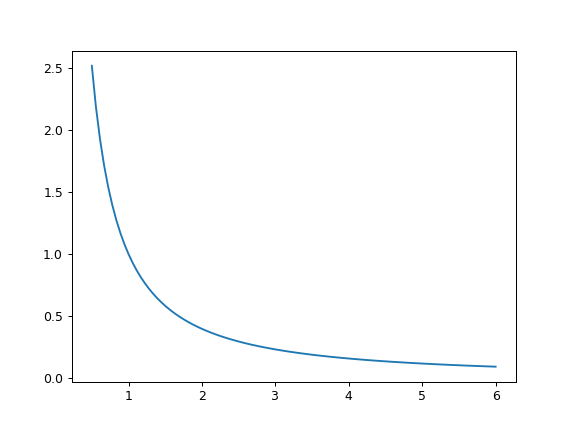

In [10]:
def deGennesCarpet(z,b,a):
    return (z/b)**a

figure()
plot(np.linspace(0.5,6,100),deGennesCarpet(np.linspace(0.5,6,100),1,-4/3))
show()

N = 128, nChain = 11, numMonos = 1408


<IPython.core.display.Javascript object>


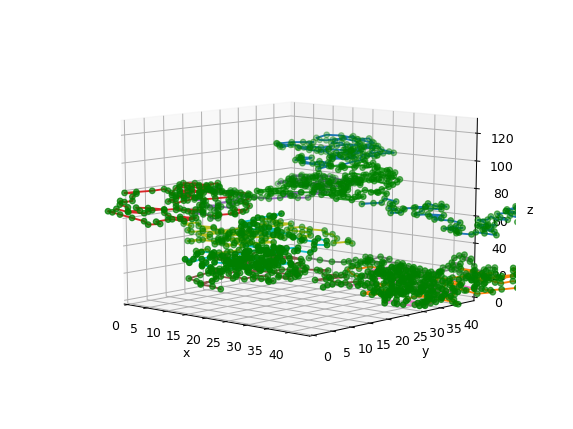

applied moves / attempted moves:
70781 / 281600 = 0.25135298295454545


<IPython.core.display.Javascript object>


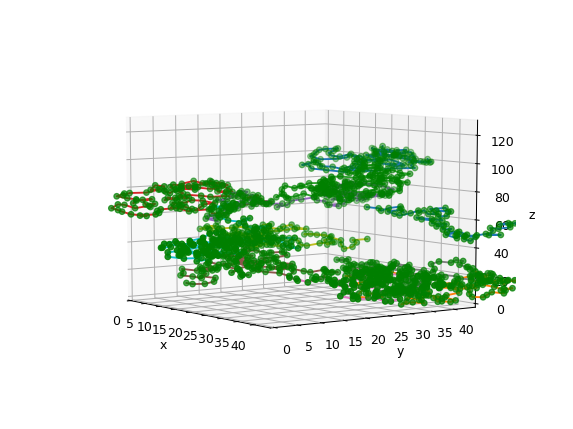

\delta = 1.5. t = 200 -> Nads/N = 0.0


In [46]:
# parameters of the chain
chainlength_ = 128
volumeFraction = 0.05
delta = 1.5

# parameters of the box
box = [44,44,128]
per = [True, True, False]

''' ---------------------------------------------------------------------- '''
# not perfectly sure about the excessible volume of the lattice,
# but as we need to round the values to integers anyway, this seems to be fine
boxVolume = np.prod([box[i]-(2*int(not a)) for i, a in enumerate(per)])
numChains_ = int( (volumeFraction* boxVolume) / (8*chainlength_) )
print("N = {}, nChain = {}, numMonos = {}".format(chainlength_, numChains_, numChains_*chainlength_))

myChainSim = bfm.setupLinearChains(chainlength_, numChains_, box, per, delta)
myChainSim.plotConfig()
myTime = 200
myChainSim.performMCS(myTime,True)
myChainSim.plotConfig()
print(r"\delta = {}. t = {} -> Nads/N = {}".format(
    myChainSim.adsorption.delta,
    myTime,
    bfm.calculateWallContacts(myChainSim))
     )